<a href="https://colab.research.google.com/github/HayateSato/DS_Practice/blob/main/Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Time series

In [19]:
import matplotlib.pyplot as plt

In [26]:
import pandas as pd

csv_url = "https://ocw.mit.edu/courses/15-071-the-analytics-edge-spring-2017/3b53e75d1ddb97bd98f40ae5bbee2475_climate_change.csv"


csv_file = pd.read_csv(csv_url,
                      #  parse_dates=["Year"], ### parse_dates will convert the specified col into dates format
                       index_col="Year"
                       )


print(csv_file.shape)
print(csv_file.head(3))
# print(csv_file.columns.tolist())
print(csv_file.info())


(308, 10)
      Month    MEI     CO2      CH4      N2O   CFC-11   CFC-12        TSI  \
Year                                                                        
1983      5  2.556  345.96  1638.59  303.677  191.324  350.113  1366.1024   
1983      6  2.167  345.52  1633.71  303.746  192.057  351.848  1366.1208   
1983      7  1.741  344.15  1633.22  303.795  192.818  353.725  1366.2850   

      Aerosols   Temp  
Year                   
1983    0.0863  0.109  
1983    0.0794  0.118  
1983    0.0731  0.137  
<class 'pandas.core.frame.DataFrame'>
Index: 308 entries, 1983 to 2008
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Month     308 non-null    int64  
 1   MEI       308 non-null    float64
 2   CO2       308 non-null    float64
 3   CH4       308 non-null    float64
 4   N2O       308 non-null    float64
 5   CFC-11    308 non-null    float64
 6   CFC-12    308 non-null    float64
 7   TSI       308 non-null  

In [27]:
csv_file.index

Index([1983, 1983, 1983, 1983, 1983, 1983, 1983, 1983, 1984, 1984,
       ...
       2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008],
      dtype='int64', name='Year', length=308)

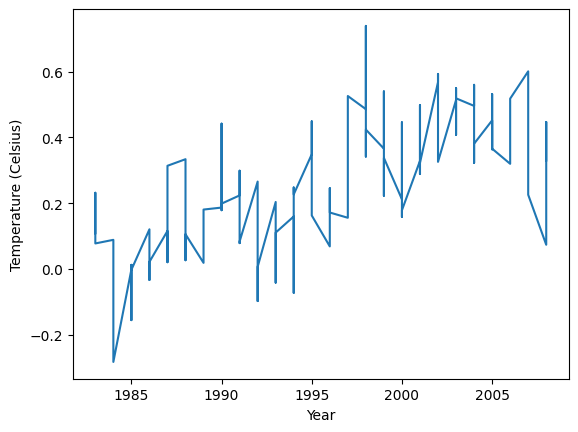

In [39]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()  # or ax = plt.axes()

ax.plot(csv_file.index, csv_file["Temp"]) # if index is time-series, you can just use as x axis

ax.set_xlabel("Year")
ax.set_ylabel("Temperature (Celsius)")

plt.show()